# Выявление закономерностей определяющих успешность игры

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Столбец-name" data-toc-modified-id="Столбец-name-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Столбец name</a></span></li><li><span><a href="#Столбец-platform" data-toc-modified-id="Столбец-platform-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Столбец platform</a></span></li><li><span><a href="#Столбец-year_of_release" data-toc-modified-id="Столбец-year_of_release-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Столбец year_of_release</a></span></li><li><span><a href="#Столбец-genre" data-toc-modified-id="Столбец-genre-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Столбец genre</a></span></li><li><span><a href="#Столбцы-na_sales,-eu_sales,-jp_sales,-other_sales" data-toc-modified-id="Столбцы-na_sales,-eu_sales,-jp_sales,-other_sales-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Столбцы na_sales, eu_sales, jp_sales, other_sales</a></span></li><li><span><a href="#Столбцы-critic_score,-user_score" data-toc-modified-id="Столбцы-critic_score,-user_score-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Столбцы critic_score, user_score</a></span></li><li><span><a href="#Столбец-rating" data-toc-modified-id="Столбец-rating-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Столбец rating</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сколько-игр-выпускалось-по-годам" data-toc-modified-id="Сколько-игр-выпускалось-по-годам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сколько игр выпускалось по годам</a></span></li><li><span><a href="#Анализ-изменения-продаж-по-платформам." data-toc-modified-id="Анализ-изменения-продаж-по-платформам.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ изменения продаж по платформам.</a></span></li><li><span><a href="#Прогноз-на-2017-год" data-toc-modified-id="Прогноз-на-2017-год-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Прогноз на 2017 год</a></span></li><li><span><a href="#Влияние-отзывов-пользователий-и-критиков-на-продажи-на-PS4" data-toc-modified-id="Влияние-отзывов-пользователий-и-критиков-на-продажи-на-PS4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Влияние отзывов пользователий и критиков на продажи на PS4</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые" data-toc-modified-id="Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a></span></li><li><span><a href="#Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные." data-toc-modified-id="Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Средние пользовательские рейтинги жанров Action и Sports разные.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import os

In [2]:
# открываем файл с данными, сохраняем в df, смотрим первые строки
if os.path.exists('games.csv'):
    df = pd.read_csv('games.csv') # локальный путь
else:
    df = pd.read_csv('/datasets/games.csv') # путь указанный в проекте
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# числовое описание данных
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
# описание сторовых данных
df.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [5]:
# общая информация о таблице
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

**Вывод**

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

У нас 16715 строк, 11 столбцов, есть пропуски и необходимо привести к нижнему регистру названия столбцов.


## Предобработка данных

In [6]:
# приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
# смотрим таблицу
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Столбец name

In [8]:
# смотрим количество пропусков
df['name'].isna().sum()

2

In [9]:
# смотрим строки с пропусками
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


И что это такое, и как это назвать... 😊 Даже жанра нет. Узнать, что это за игра, не получится. Правильнее будет удалить эти строки из анализа, так как они совершенно неинформативные.

In [10]:
# удаляем пустые строки
df.dropna(subset=['name'], inplace=True)

In [11]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Столбец platform

In [12]:
# смотрим уникальные значения
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Со столбцом всё отлично.

В столбце указан год выпуска, изменим тип данных на  целое цисло.

### Столбец year_of_release

In [13]:
# уникальные значения
df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [14]:
# смотрим количество пропусков
df['year_of_release'].isna().sum()

269

In [15]:
# смотрим строки с пропусками
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Было бы логично заменить пропуски значением года выпуска игры с пропуском на других платформах, например медианой, на случай, если бы был разный год выпуска, но я не придумала как это сделать.  Для дальнейшей работы со столбцом, заменим пропуски на "0", удалять данные с пропусками считаю не верным, так как удалятся данные и по продажам, а они нам  нужны в дальнейшей работе.

In [16]:
# заменяем пропуски и меняем тип данных
df['year_of_release'] = df['year_of_release'].fillna(0).astype('Int64')

### Столбец genre

In [17]:
# уникальные значения
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Пропусков  в этом столбце нет, каких либо аномальных значений тоже нет.

### Столбцы na_sales, eu_sales, jp_sales, other_sales

In [18]:
# числовое описание данных
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16713.000000,16713.000000,16713.000000,16713.000000
mean,0.263302,0.145045,0.077625,0.047343
std,0.813565,0.503359,0.308871,0.186742
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


Тут всё отлично. Обратим внимание, что максимальное значение во всех столбцах по продажам на несколько порядков выше значения в третьем квартиле. Добавим столбец с сумарными продажами.

In [19]:
# добавляем столбец с суммарными продажами
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [20]:
# смотрим таблицу
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Столбцы critic_score, user_score

In [21]:
# числовое описание данных 
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

В столбце большое количество пропусков, для дальнейшей работы со столбцом заменим их на "0", чтобы не удалять строки, так как данные из других столбцов в этих строках нам пригодятся.

In [22]:
# заменяем пропуски и меняем тип данных
df['critic_score'] = df['critic_score'].fillna(0).astype('int')

In [23]:
# описание данных 
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

В столбце `user_score` также большое количество пропусков и  присутствует значение "tbd" - скорее всего это "To Be Determined" - "Предстоит Определить". В этих строках  пользовательский рейтинг ёщё не определен, поэтому логичнее всего будет заменить эти значения на nan, а затем заменить все пропуски а "0", также как и в столбце `critic_score`

In [24]:
# заменяем пропуски и меняем тип данных
df.loc[(df['user_score']=='tbd'), 'user_score'] = np.nan
df['user_score'] = df['user_score'].fillna(0).astype(float)

### Столбец rating

In [25]:
# смотрим уникальные значения
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

В столбце большое количество пропусков, также заменим пропуски на "0", для дальнейшей работы со столбцом

In [26]:
# заменяем пропуски 
df['rating'] = df['rating'].fillna(0)

### Проверка на дубликаты

In [27]:
# проверяем дубликаты
df.duplicated().sum()

0

**Вывод**


В ходе предобработки данных изменили названия столбцов, привели их к нижнему регистру.
Удалили 2 неинформативные строики из таблицы. 
Добавили в таблицу столбец `total_sales` - с суммарным значением продаж. 
 
Заменили пропуски в столбцах `critic_score`, `user_score`, `rating` и `year_of_release` на ноль, так как пропуски ни с чем не связаны и заменить их на  логически подходящие значения невозможно, заменять значения на медиану или среднее считаю не верным, так как это может исказить  данные. Так же, изменили тип данных в столбцах.


##  Исследовательский анализ данных

### Сколько игр выпускалось по годам

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

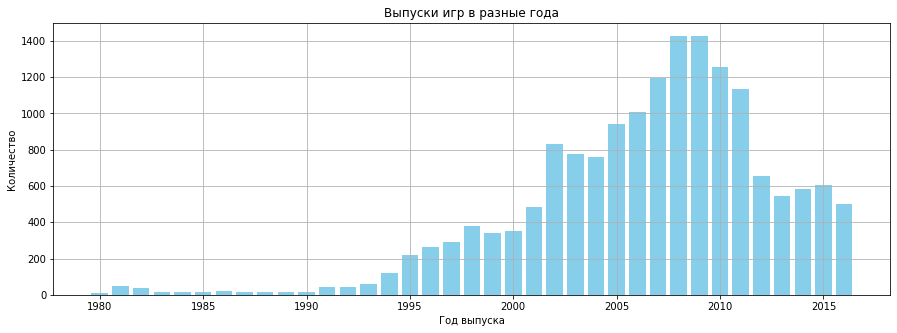

In [28]:
# создаем таблицу с количеством выпусков игр по годам
years_game = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc= 'count')\
    .query('year_of_release != 0').reset_index()


# меняем название столбцов в полученной таблице
years_game.columns = ['year', 'count']


# отражаем полученный результат на графике
plt.figure(figsize=(15, 5))
plt.bar(years_game['year'], years_game['count'],color='#87CEEB')
plt.grid()
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Выпуски игр в разные года')
plt.show();


По полученным данным видим, что до 1994 года игры почти не выпускались. Начиная с 1994 года выпуск игр начал постепенно увеличиваться. В 2002 году произошел скачок  выпуска игр. 2008-2009 годы с максимальным количеством выпусков, далее игр становилось меньше, в 2012 году количество выпускаемых игр сильно упало, примерно в 2 раза по сравнению с 2011 годом, и до 2016 года оно лишь незначительно колебалось.

Можно предположить, что рынок игр начал активно развиваться с 1994 года, поэтому данные за предыдущие периоды, при необходимости, можно исключить из анализа рынка.

###  Анализ изменения продаж по платформам.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

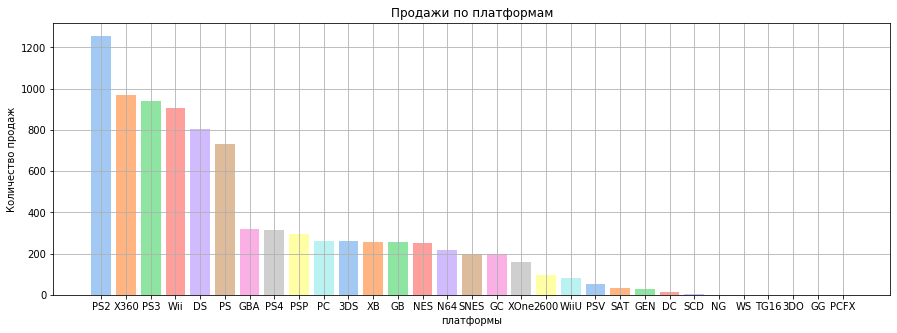

In [29]:
# создаём таблицу с количеством продаж по платформам
platform_sales = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc= 'sum')\
    .sort_values(by='total_sales', ascending=False).reset_index()

# отражаем полученный результат на графике
plt.figure(figsize=(15, 5))
plt.bar(platform_sales['platform'], platform_sales['total_sales'], width=0.8, color = sns.color_palette('pastel'))
plt.xlabel('платформы')
plt.ylabel('Количество продаж')
plt.grid()
plt.title('Продажи по платформам')
plt.show();

In [30]:
# найдем топ-10 платформ с наибольшими суммарными продажами
top_10_platform_sales = platform_sales.sort_values(by='total_sales', ascending=False).head(10)
print('Топ 10 платформ с наибольшими суммарными продажами:')
top_10_platform_sales

Топ 10 платформ с наибольшими суммарными продажами:


,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


PS2 - лидер по продажам, более 1200 продаж за всё время, со 2 по 5 место идут платформы X360, PS3, Wii, DS у них примерно одинаковое количество продаж на платформах. 

In [31]:
# смотрим строку с аномальным значением
df.query('platform == "DS" and year_of_release < 2004 and year_of_release != 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0,0.0,0,0.02


In [32]:
# удаляем строку с аномальным значением
df = df.drop(index=[15957])

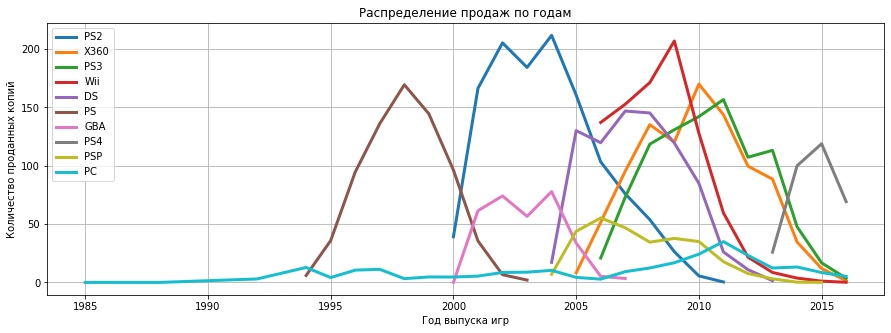

In [33]:
# создаем таблицу с количеством продаж по годам
years_platform_sales = df.pivot_table(index=['platform', 'year_of_release'], values = 'total_sales', aggfunc='sum')\
    .query('year_of_release != 0').reset_index()


# отражаем полученный результат на графике
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()

for platform in top_10_platform_sales['platform'].unique():
    x = years_platform_sales[years_platform_sales['platform']==platform]['year_of_release']
    y = years_platform_sales[years_platform_sales['platform']==platform]['total_sales']

    line = ax.plot(x, y, linewidth=3, label=platform)

ax.set_title('Распределение продаж по годам', size=12)
ax.set_xlabel('Год выпуска игр')
ax.set_ylabel('Количество проданных копий')
ax.legend()
ax.grid(True)
plt.show();

Можно заметить, что у большинства  популярных платформ, примерно одинаковая картина развития, появление на рынке, затем резкое повышение количество продаж, после этого идет небольшой спад, далее  всё возврашается на прежний уровень и потом продажи идут на убыль уже до конца жизненного цикла платформы. Таким образом на графиках мы видим буквы "М".

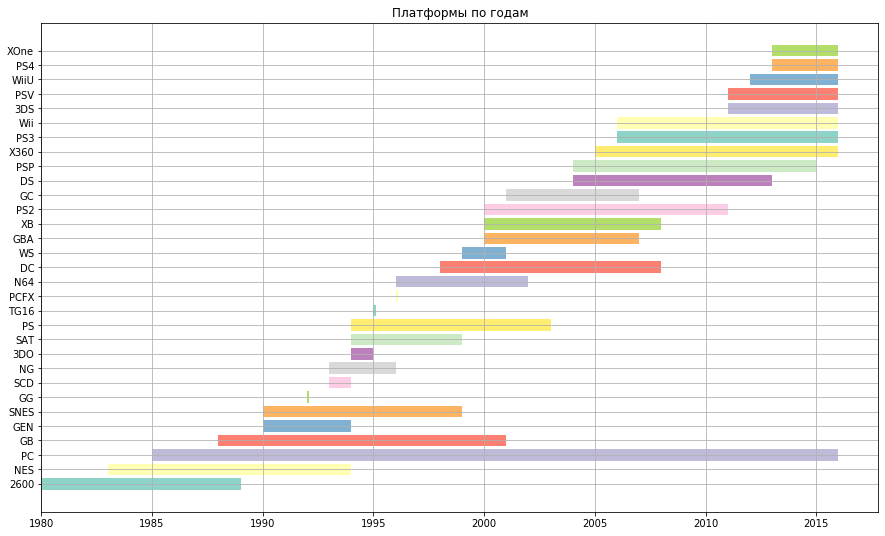

Средняя продолжительность жизненного цикла платформы: 7.0 лет.


In [34]:
# создаем таблицу с первым и последним годом продаж по платформам
years_platform = df.query('year_of_release != 0').groupby('platform').agg({'year_of_release':['min', 'max',]}).reset_index()
years_platform.columns=['platform','min', 'max']

# создаем столбец с продолжительностью продаж на платформе в годах 
years_platform['diff'] = (years_platform['max'] - years_platform['min']).replace(0, 0.1)
years_platform = years_platform.sort_values(by=['min', 'diff'])

# отражаем полученный результат на графике
fig, ax = plt.subplots(1, figsize=(15,9))
ax.barh(years_platform['platform'], years_platform['diff'], left=years_platform['min'], color = sns.color_palette('Set3'))
ax.set_title('Платформы по годам', size=12)
ax.grid(True)
plt.show()

print('Средняя продолжительность жизненного цикла платформы:', round(years_platform['diff'].mean()), 'лет.')

По полученным данным видим, что средняя продолжительность жизненного цикла платформы 7 лет. Есть платформы, у которых продолжительность продаж не составляет даже года, а есть и очень "долго живущие" платформы, такие как PC, она существет по сей день, начиная с 85 года. Также можно заметить, что новые платформы появляются  примерно каждые 5 лет.

###  Прогноз на 2017 год

За актуальный период возьмем предыдущие 3 года, так как мы определили, что средний жизненный цикл платформ - 7 лет, возьмем чуть меньше половины этого срока. Для прогноза на 2017 год возьмем данные начиная с 2014 года.

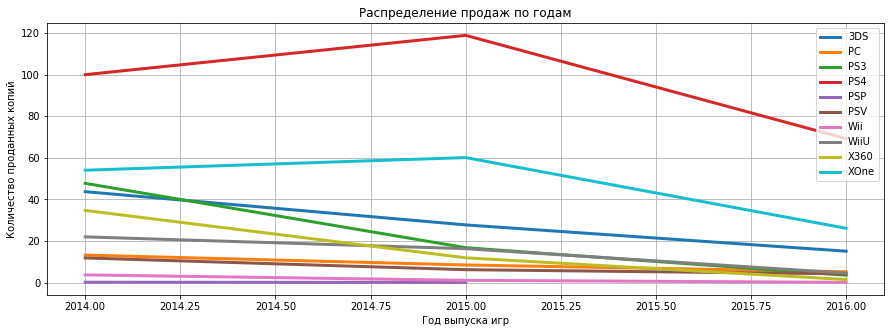

In [35]:
#  берём данные за нужный период
actual_period = df.query('year_of_release > 2013')

# создаем количество продаж по годам за актуальный период
actual_platform = actual_period.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')\
    .query('year_of_release != 0 and year_of_release > 2008').reset_index()


# отражаем полученный результат на графике
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

for platform in actual_platform['platform'].unique():
    x = actual_platform[actual_platform['platform']==platform]['year_of_release']
    y = actual_platform[actual_platform['platform']==platform]['total_sales']

    line = ax.plot(x, y, linewidth=3, label=platform)

ax.set_title('Распределение продаж по годам', size=12)
ax.set_xlabel('Год выпуска игр')
ax.set_ylabel('Количество проданных копий')
ax.legend()
ax.grid(True)
plt.show();
    

По полученным данным видим, что практически все платформы пришли к своему завершению, потенциально прибыльными выглядят только PS4 и XOne, обе появились в 2013 году. Eще есть 3 платформы, которые появились раньше - PSV в 2011, WiiU в 2012,  3DS в 2011 и они на данные момент на середине своего цикла развития, поэтому вложения в эти платформы тоже уместно, но должны быть умеренными.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

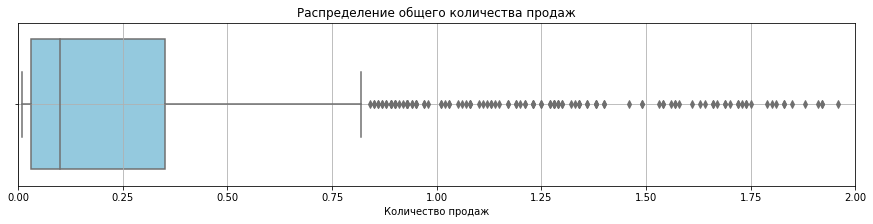

In [36]:
# смотрим диаграмму распределения по общему количеству продаж
plt.figure(figsize=(15,3))
sns.boxplot(data=actual_period, x='total_sales', color='#87CEEB') 
plt.xlim(0, 2)
plt.xlabel('Количество продаж')
plt.grid()
plt.title('Распределение общего количества продаж')
plt.show();

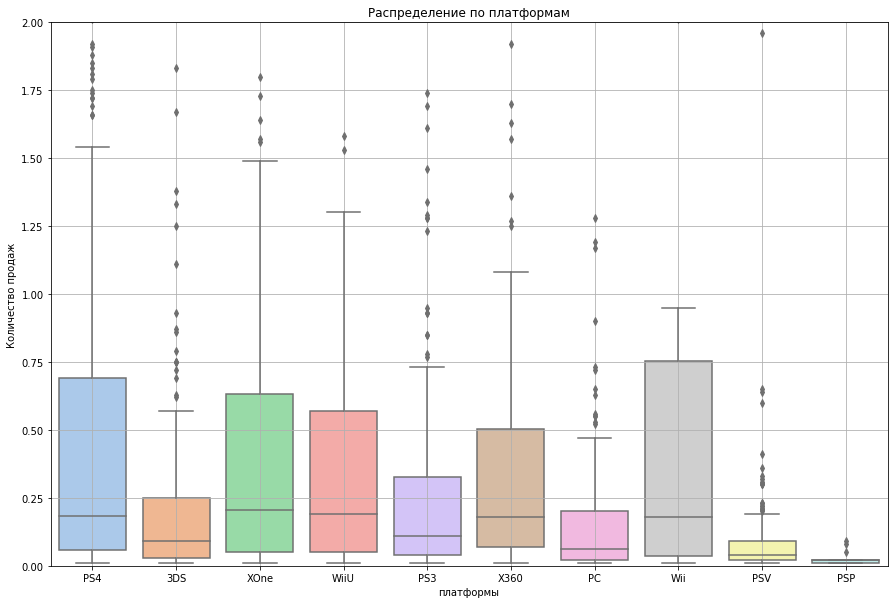

In [37]:
# смотрим диаграмму распределения по платформам
plt.figure(figsize=(15,10))
sns.boxplot(data=actual_period, x='platform', y='total_sales', orient='v', palette='pastel') 
plt.ylim(0, 2)
plt.title('Распределение по платформам')
plt.xlabel('платформы')
plt.ylabel('Количество продаж')
plt.grid()
plt.show();

Выделим 4 платформы PS4, XOne, WiiU и Wii медиана продаж на этих платформах около 0,2 млн копий. У остальных медиана на уровне  от 0,1 до 0,15 миллионов копий игр.

###  Влияние отзывов пользователий и критиков на продажи на PS4

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

Рассмотрим влияние отзывов пользователей и критиков на продажи игр на примере платформы PS4 - лидера по продажам в период за 2014-2016 гг.

Коэффициент корреляции для пользовательских оценок: -0.04 


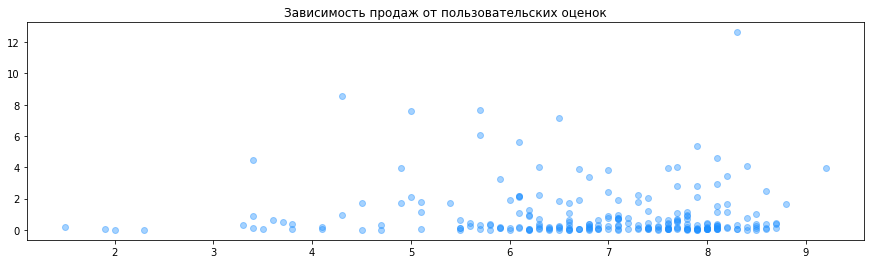

In [38]:
PS4 = actual_period.query('platform=="PS4"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
PS4 = PS4.query('user_score != 0 and critic_score != 0')

plt.figure(figsize=(15,4))
print('Коэффициент корреляции для пользовательских оценок: {} '.format(round(PS4['user_score'].corr(PS4['total_sales']), 2)))
plt.scatter(x='user_score', y='total_sales', data=PS4, color='#1E90FF', alpha = 0.4)
plt.title('Зависимость продаж от пользовательских оценок', fontsize=12)
plt.show();

Коэффициент корреляции для оценок критиков: 0.4 


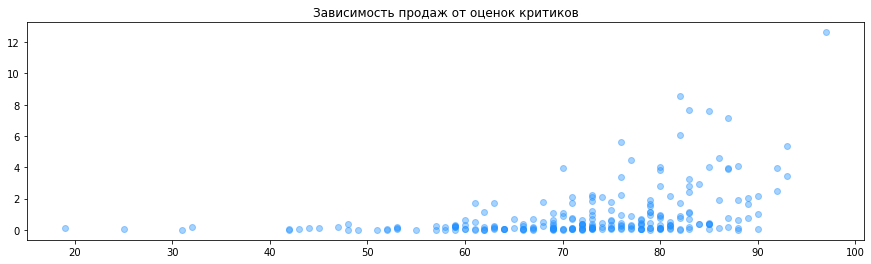

In [39]:
plt.figure(figsize=(15,4))
print('Коэффициент корреляции для оценок критиков: {} '.format(round(PS4['critic_score'].corr(PS4['total_sales']), 2)))
plt.scatter(x='critic_score', y='total_sales', data=PS4, color='#1E90FF', alpha = 0.4)
plt.title('Зависимость продаж от оценок критиков', fontsize=12)
plt.show();

По полученным данным видим, что  для платформы PS4 зависимости продаж от пользовательской оценки нет, а вот зависимость от оценки критиков небольшая, но есть - чем выше оценка критиков, тем больше продаж.

**Соотнесите выводы с продажами игр на других платформах.**


Коэффициент корреляции для пользовательских оценок: 0.01 


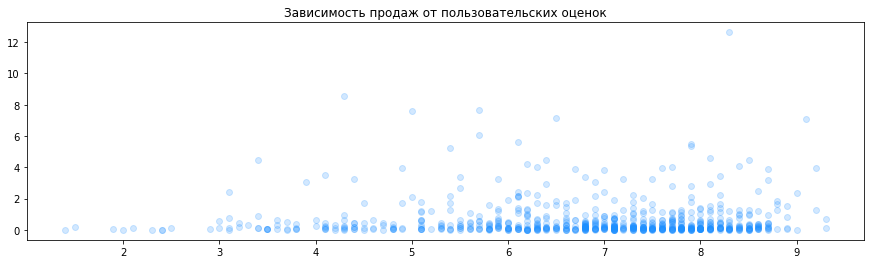

In [40]:
plt.figure(figsize=(15,4))
print('Коэффициент корреляции для пользовательских оценок: {} '\
      .format(round(actual_period.query('user_score != 0 and critic_score != 0')['user_score']\
                    .corr(actual_period['total_sales']), 2)))
plt.scatter(x='user_score', y='total_sales', data=actual_period\
            .query('user_score != 0 and critic_score != 0'), color='#1E90FF', alpha = 0.2)
plt.title('Зависимость продаж от пользовательских оценок', fontsize=12)
plt.show();

Коэффициент корреляции для оценок критиков: 0.33 


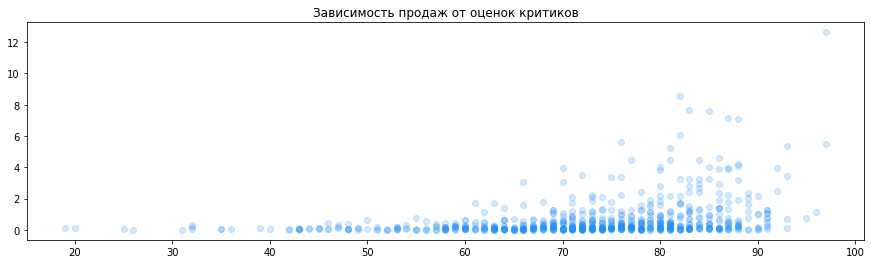

In [41]:
plt.figure(figsize=(15,4))
print('Коэффициент корреляции для оценок критиков: {} '\
      .format(round(actual_period.query('user_score != 0 and critic_score != 0')['critic_score']\
                    .corr(actual_period['total_sales']), 2)))
plt.scatter(x='critic_score', y='total_sales', data=actual_period\
            .query('user_score != 0 and critic_score != 0'), color='#1E90FF', alpha = 0.2)
plt.title('Зависимость продаж от оценок критиков', fontsize=12)
plt.show();

По полученным данным также видим, что зависимости от пользовательской оценки на других платформах нет, при этом есть небольшая зависимость от оценки критиков.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

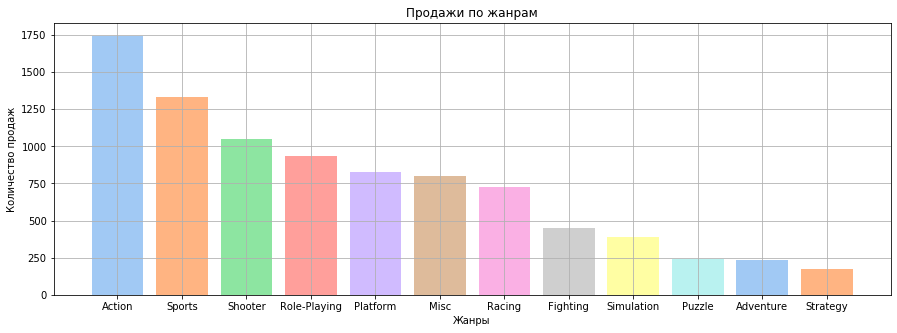

In [42]:
# создаём таблицу с количеством продаж по жанрам
genre_sales = df.pivot_table(index = 'genre', values = 'total_sales', aggfunc= 'sum')\
   .sort_values(by='total_sales', ascending=False).reset_index()

# отражаем полученный результат на графике
plt.figure(figsize=(15, 5))
plt.bar(genre_sales['genre'], genre_sales['total_sales'], color = sns.color_palette('pastel'))
plt.grid()
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество продаж')
plt.show();



Видим, что самый популярный жанр это Action - динамичные игры  очень привлекательны. Также популярны жанры Sport и Shooter. Самый не популярный жанр игр это Strategy - не всем нравится много думать.  

##  Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [43]:
# создаём словарь с топ 5-ю платформами по регионам продаж
top5_platform = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_platform[region] = actual_period.groupby('platform')[region].sum().sort_values(ascending=False).head(5)

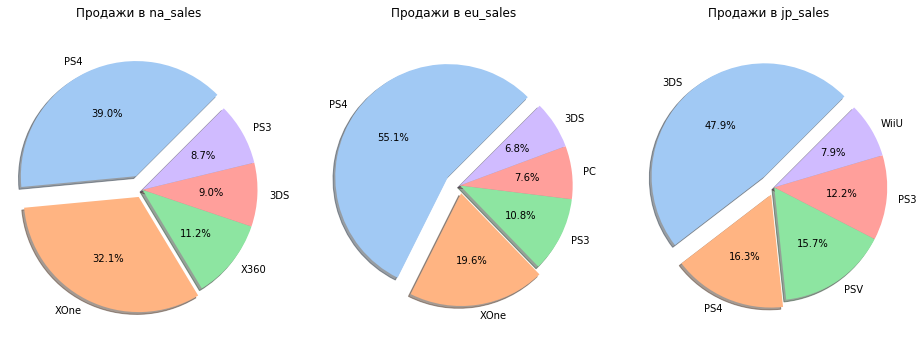

In [44]:
# отражаем полученный результат на графике
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']

for i in [0,1,2]:
    labels = top5_platform[region[i]].index
    sizes = top5_platform[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=(0.13, 0.07, 0, 0, 0),\
           startangle=45, colors = sns.color_palette('pastel')) 
    ax.axis('equal')  

plt.show()

Видим, что лидеры в разных регионах отличаются - в Северной Америке и Европе предпочитают платформу PS4, на втором месте Xone,в Северной Америке на третьем месте X360, а в Европе на 3 месте по популярности РS3. В Японии же самая популярная платформа 3DS за ней идет PS4.

In [45]:
# создаём словарь с топ 5-ю жанрами по регионам продаж
top5_genre = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_genre[region] = actual_period.groupby('genre')[region].sum().sort_values(ascending=False).head(5)

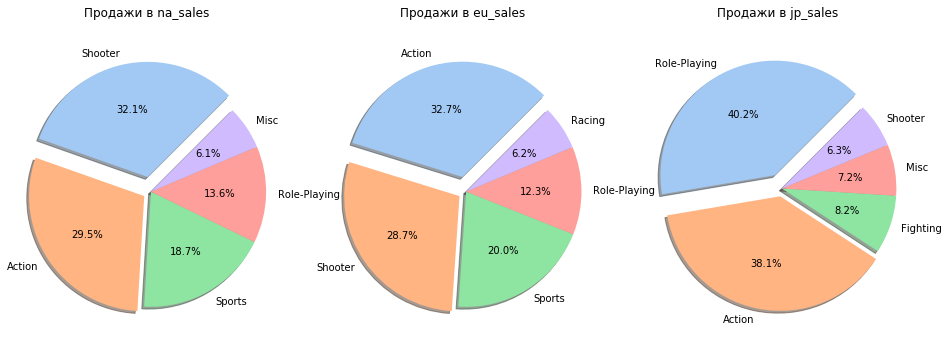

In [46]:
# отражаем полученный результат на графике
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']

for i in [0,1,2]:
    labels = top5_genre[region[i]].index
    sizes = top5_genre[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=(0.13, 0.07, 0, 0, 0),\
           startangle=45, colors = sns.color_palette('pastel')) 
    ax.axis('equal')  

plt.show()

В разных регионах также лидируют разные жанры игр. В Северной Америке самый популярный жанр Shooter и Action на третьем месте игры жанра Sports. В Европе же немного иначе самый популярный Action, за ним  Shooter и Sports. В Японии же картина совсем отличатся  самый популярный жанр это Role-Playing на втором месте Action, на третьем Fighting.  Северная Америка и Европа похожи по своей культуре, вероятно поэтому и  жанры игр им нравятся одни и теже. А вот Япония это отдельная "планета" - там живут анимэшки и мастера косплея.

In [47]:
# создаём таблицу с рейтингом и количеством продаж по регионам 
esrb = actual_period.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', ascending=False)\
    .reset_index()
esrb

,rating,na_sales,eu_sales,jp_sales
0,M,96.42,93.44,8.01
1,0,64.72,58.95,56.90
2,E,50.74,58.06,8.94
3,T,38.95,34.07,14.78
4,E10+,33.23,26.16,4.46


In [48]:
top5_esrb = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_esrb[region] = actual_period.groupby('rating')[region].sum().sort_values(ascending=False).head(5)

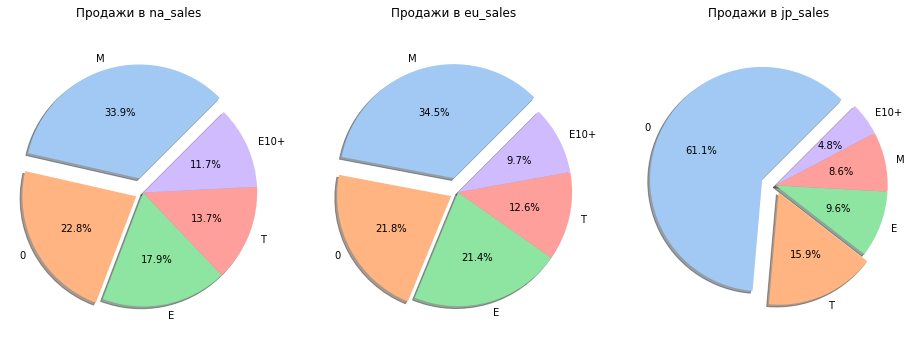

In [49]:
# отражаем полученный результат на графике
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']

for i in [0,1,2]:
    labels = top5_esrb[region[i]].index
    sizes = top5_esrb[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=(0.13, 0.07, 0, 0, 0),\
           startangle=45, colors = sns.color_palette('pastel')) 
    ax.axis('equal')  

plt.show()

Рейтинг игры:

* EC («Early childhood») — Для детей младшего возраста
* E («Everyone») — Для всех
* E10+ («Everyone 10 and older») — Для всех старше 10 лет
* T («Teen») — Подросткам 13—19 лет
* M («Mature») — От 17 лет
* AO («Adults Only 18+») — Только для взрослых
* RP («Rating Pending»») — Рейтинг ожидается
* K-A («Kids to Adults»)— Для детей и взрослых


Видим, что наибольшее количетво продаж в Северной Америке и Европе у игр с рейтингом M («Mature») — От 17 лет, также выделяются ретинги E,  E10+ и игры без рейтинга. Видим, что в Японии самое большое количество продаж у игр без рейтинга.

##  Проверка гипотез

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


###  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза H₀** Средние пользовательские рейтинги платформ Xbox One и PC равны

**Алтернативная гипотеза H₁** Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [50]:
# создаём две необходимые выборки 
xone = actual_period.query('platform == "XOne" and user_score != 0')['user_score']
pc = actual_period.query('platform == "PC" and user_score != 0')['user_score']

In [51]:
# оцениваем дисперсию по выборке xone и pc
print('Дисперсия пользовательского рейтинга на платформе XOne:', np.var(xone, ddof=1))
print('Дисперсия пользовательского рейтинга на платформе PC:', np.var(pc, ddof=1))
print('Соотношение дисперсий:', np.var(pc, ddof=1) / np.var(xone, ddof=1))

Дисперсия пользовательского рейтинга на платформе XOne: 1.8910066518847013
Дисперсия пользовательского рейтинга на платформе PC: 2.901154315133451
Соотношение дисперсий: 1.5341851453785051


In [52]:
# выполняем проверку гипотезы
alpha = 0.05 

results = st.ttest_ind(xone, pc, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [53]:
print('Cреднее значение пользовательского рейтинга на платформе XOne:', np.mean(xone))
print('Cреднее значение пользовательского рейтинга на платформе PC:', np.mean(pc))

Cреднее значение пользовательского рейтинга на платформе XOne: 6.594545454545456
Cреднее значение пользовательского рейтинга на платформе PC: 6.298360655737705


Нулевую гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC равны" - не получилось отвергнуть 

**Подтверждается нулевая гипотеза**

### Средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевая гипотеза H₀** Средние пользовательские рейтинги жанров Action и Sports равны

**Алтернативная гипотеза H₁** Средние пользовательские рейтинги жанров Action и Sports не равны

In [54]:
# создаём две необходимые выборки 
action = actual_period.query('genre == "Action" and user_score != 0')['user_score']
sports = actual_period.query('genre == "Sports" and user_score != 0')['user_score']

In [55]:
# оцениваем дисперсию по выборке action и sports
print('Дисперсия пользовательского рейтинга по жанру Action:', np.var(action, ddof=1))
print('Дисперсия пользовательского рейтинга по жанру Sports:', np.var(sports, ddof=1))
print('Соотношение дисперсий:', np.var(sports, ddof=1) / np.var(action, ddof=1))

Дисперсия пользовательского рейтинга по жанру Action: 1.8984766584766581
Дисперсия пользовательского рейтинга по жанру Sports: 3.446979127609048
Соотношение дисперсий: 1.8156552582399994


In [56]:
# выполняем проверку гипотезы
alpha = 0.05 

results = st.ttest_ind(action, sports, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [57]:
print('Cреднее значение пользовательского рейтинга по жанру Action:', np.mean(action))
print('Cреднее значение пользовательского рейтинга по жанру Sports:', np.mean(sports))

Cреднее значение пользовательского рейтинга по жанру Action: 6.760606060606061
Cреднее значение пользовательского рейтинга по жанру Sports: 5.2251968503937


**Подтверждается альтернативная гипотеза** - Средние пользовательские рейтинги жанров Action и Sports не равны

##  Общий вывод

В ходе предобработки обнаружили несколько проблем: 

* пропущенные значения
* некорректное название столбцов

Названия столбцов привели к нижнему регистру. В столбце `name` удалено 2 строки, так как в них не было других данных. Добавили столбец `total_sales` с суммой всех продаж в регионах.


По результатам исследовательского анализа данных в период до 1994 почти не выпускалось игр. Начиная с 1994 года выпуск игр начал постепенно увеличиваться. В 2002 году произошел резкий рост количества выпускаемых игр. 2008-2009 годы с максимальным количеством выпусков, далее игр становилось меньше, в 2012 году количество выпускаемых игр сильно упало - примерно в 2 раза по сравнению с 2011 годом, и до 2016 года было незначительное колебание по числу выпускаемых игр. Определили, что средняя продолжительность жизненного цикла платформ 8 лет и примерно каждые 5 лет появляются новые платформы. Получили топ-5  платформ: PS2, X360, PS3, Wii, DS.

Определили потенциально прибыльные и растущие платформы - PS4 и XOne. Платформы PSV, WiiU и 3DS - тоже можно продолжать развивать, но умеренно.

Рассмотрели влияние отзывов пользователей и критиков на продажи игр на примере платформы PS4 за период 2014-2016 гг и остальных платформ за этот же период. Оценки пользователей совершенно не влияют на продажи игр, а вот оценки критиков имеют  некоторое влияние - чем выше оценка, тем больше продаж.


Рассмотрели игры по жанрам - самые популярные жанры Action, Sports и Shooter -  динамичные игры с захватывающим сюжетoм, намного приведлекательнее игр жанра Strategy.


Определили портрет пользователя каждого региона. Лидеры продаж в регионах разные: Северная Америка - PS4, Европа - PS4 и Япония - 3DS. В Северной Америке и Европе пользуются почти одними и теми же  платформами  PS4, Xone, PS3, 3DS, отличается только одна плотформа в Северной Америке на 3 месте по популярности платформа X360 в Европе на 4 месте платформа PC. В Японии совсем другая картина: тут более популярны платформы 3DS, PS4 и PSV.В Северной Америке, Европе и других регионах совпадают топ-3 жанра Action, Shoter и Sports . В Японии же другие взгляды, поэтому и лидирует жанр Role-Playing, хотя тоже очень популярны Action. Влияние рейтинга ESRB на продажи в разных регионах почти одинаково. в Северной Америке и Европе yа первом месте «M» и далее «E», «0» и «E10+». В Япoнии на первом месте игры без рейтинга.


Проверены гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Первая гипотеза  подтвердилась - средние пользовательские рейтинги платформ Xbox One и PC не отличаются. Вторая гипотеза тоже  подтвердилась  - Средние пользовательские рейтинги жанров Action и Sports разные.

В заключение можно сделать вывод, что успешная компьютерная игра должна обладать следующими характеристиками:

* игра должна быть разработана для платформ PS4 или XOne, если речь идет о западном рынке, и для платформ 3DS, если игру планируется продавать в Японии;
* жанр должен быть Action, Shooter или Sports для западного рынка, и Role-Playing для Японии;
* у игры должен быть рейтинг ESRB «M» («Mature») — От 17 лет
* желательно, чтобы у игры были высокие оценки от критиков.